In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

sns.set_theme(style="ticks")
df = pd.read_csv("https://raw.githubusercontent.com/sugus-labs/data-science-the-bridge/main/2-data-analysis/extra/bank-marketing/bank-full.csv")



df.head(25)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [58]:
#groupby

bins = [0, 29, 39, 49, 59, 99]
labels = ['20s', '30s', '40s', '50s', '+60s']
age_groups = pd.cut(df.age, bins, labels=labels)
df['age_groups']  =  age_groups

In [59]:
df_y = df[df["y"] == "yes"]
df_n = df[df["y"] == "no"]

In [61]:
df_y.describe()


,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


c:\Users\jpcar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:

df_y.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_groups
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50s
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50s
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40s
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50s
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50s
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,40s
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,50s
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,+60s
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,30s
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,30s


In [63]:
groups = df_y.groupby(['age_groups', 'marital', 'loan', 'y'])
groups.size()


age_groups  marital   loan  y  
20s         divorced  no    yes      9
                      yes   yes      2
            married   no    yes     99
                      yes   yes     24
            single    no    yes    735
                      yes   yes     59
30s         divorced  no    yes    138
                      yes   yes     20
            married   no    yes    814
                      yes   yes     99
            single    no    yes    777
                      yes   yes     65
40s         divorced  no    yes    153
                      yes   yes     22
            married   no    yes    598
                      yes   yes     80
            single    no    yes    194
                      yes   yes     16
50s         divorced  no    yes    139
                      yes   yes     21
            married   no    yes    514
                      yes   yes     58
            single    no    yes     46
                      yes   yes      7
+60s        divorced  no    yes 

In [64]:
100 * groups.size() / len(df_y)

age_groups  marital   loan  y  
20s         divorced  no    yes     0.170164
                      yes   yes     0.037814
            married   no    yes     1.871809
                      yes   yes     0.453772
            single    no    yes    13.896767
                      yes   yes     1.115523
30s         divorced  no    yes     2.609189
                      yes   yes     0.378143
            married   no    yes    15.390433
                      yes   yes     1.871809
            single    no    yes    14.690868
                      yes   yes     1.228966
40s         divorced  no    yes     2.892796
                      yes   yes     0.415958
            married   no    yes    11.306485
                      yes   yes     1.512573
            single    no    yes     3.667990
                      yes   yes     0.302515
50s         divorced  no    yes     2.628096
                      yes   yes     0.397050
            married   no    yes     9.718283
                      y

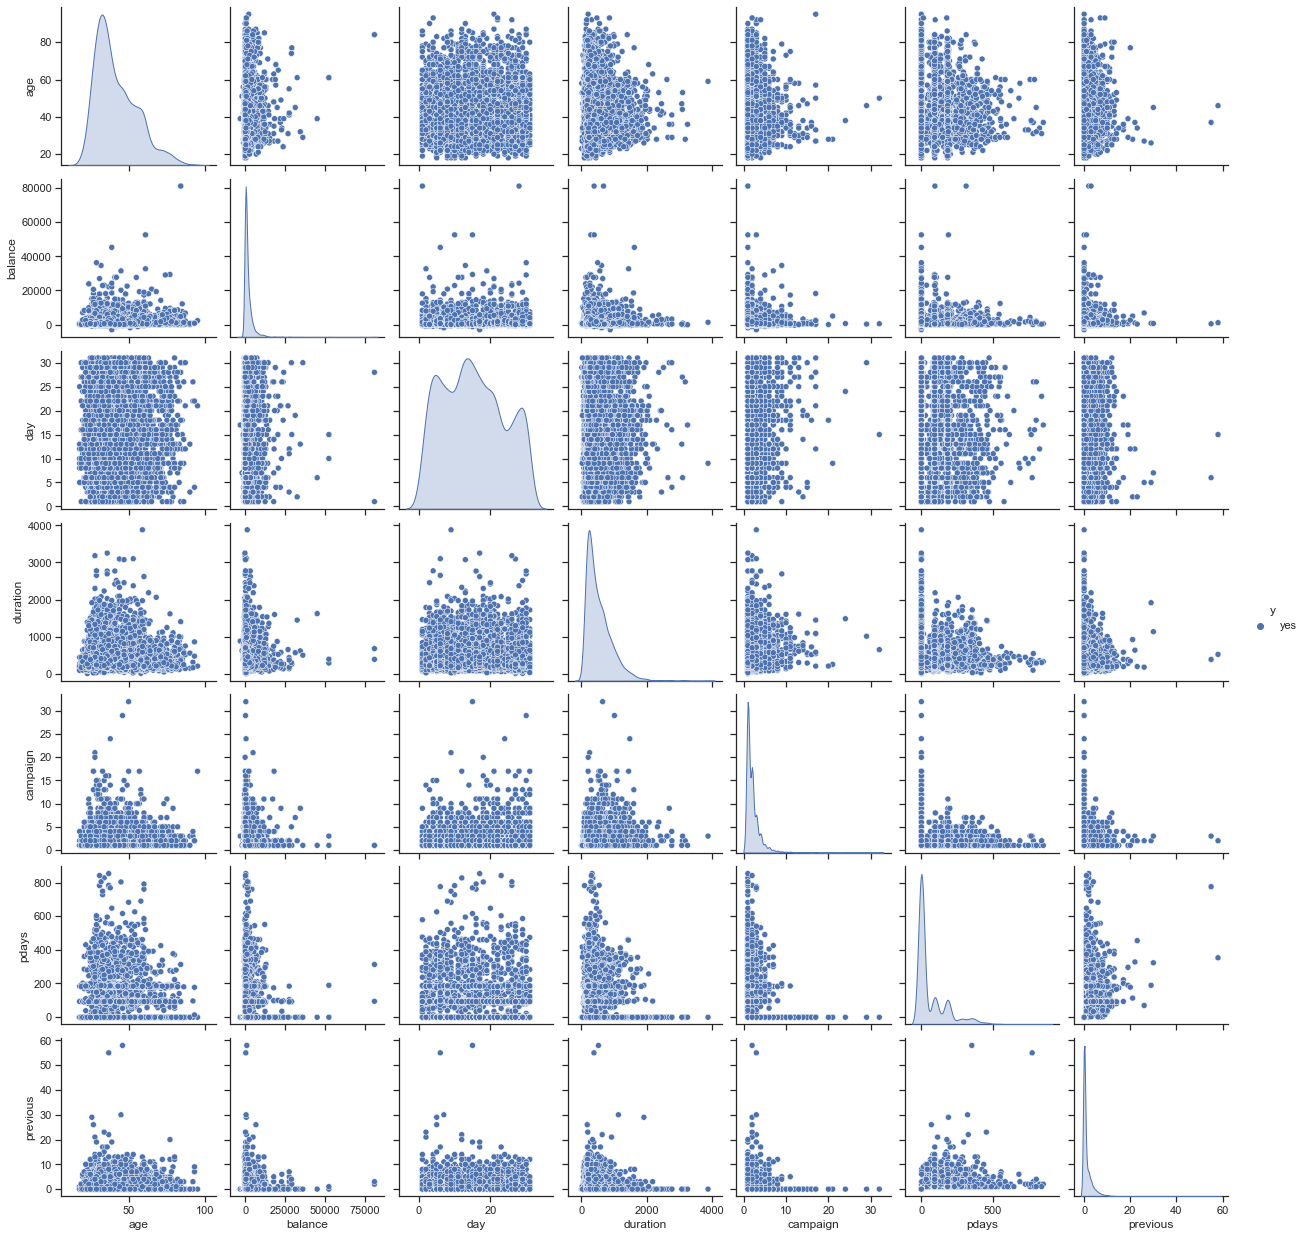

In [65]:
sns.pairplot(df_y, hue="y")
plt.show()

In [42]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


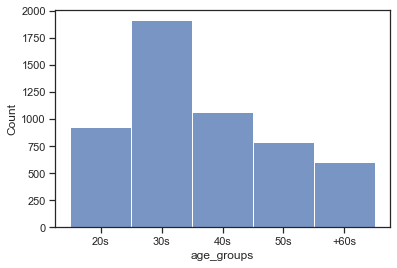

In [67]:
sns.histplot(df_y.age_groups)
plt.show()


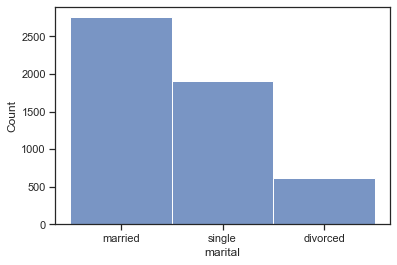

In [68]:
sns.histplot(df_y.marital)
plt.show()

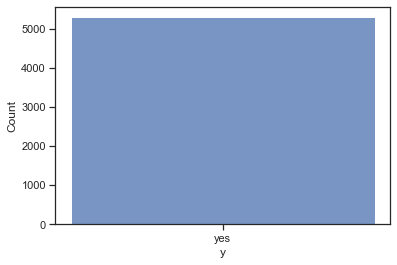

In [69]:
sns.histplot(df_y.y)
plt.show()

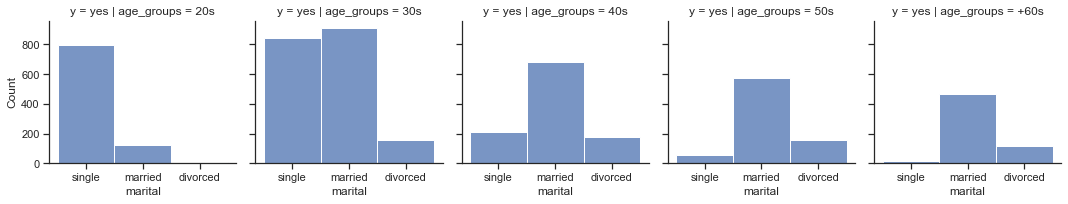

In [71]:
g = sns.FacetGrid(df_y, row='y', col='age_groups')
g.map(sns.histplot, "marital")
plt.show()

In [49]:
sns.set_theme(style="ticks")
sns.pairplot(df_y, hue="marital")
plt.show()

KeyboardInterrupt: 

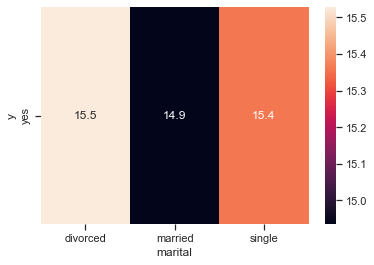

In [73]:
df2 = df_y.pivot_table(index='y', columns='marital', values='day', aggfunc=np.mean)
sns.heatmap(df2, annot=True, fmt=".1f")
plt.show()

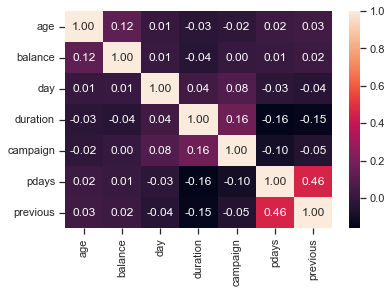

In [74]:
sns.heatmap(df_y.corr(), annot=True, fmt=".2f")
plt.show()

ValueError: need at least one array to concatenate

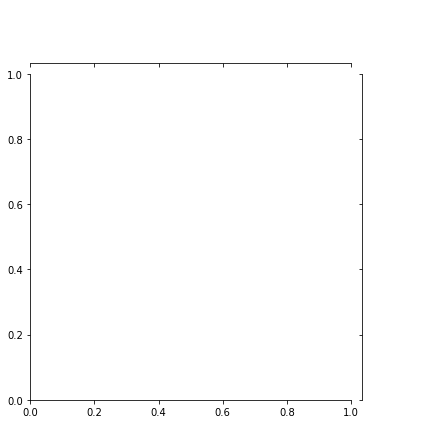

In [21]:
help(sns.jointplot(kind = 'reg'))

In [14]:
sns.jointplot(data=df, x='age', y='marital', kind='reg', color='g')
plt.show()

ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but y was passed.`

In [49]:
dff = df.pivot_table(index='age', columns='y', values='marital', aggfunc=np.median)
sns.heatmap(dff, annot=True, fmt=".1f")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
g = sns.FacetGrid(df, row='age', col='marital')
g.map(sns.histplot, "age")
plt.show()

In [2]:
def age_grouping(age):
    
    if age >= 18 and age < 29:
        cat = "20"
    elif age >= 29 and age < 39:
        cat = "30"
    elif age >= 39 and age < 49:
        cat = "40"
    elif age >= 49 and age < 59:
        cat = "50"
    else:
        cat = "+60"

    return cat

In [3]:
df["age_cat"] = df["age"].apply(lambda x:  age_grouping(x))

In [4]:
age_groups = df["age_cat"].value_counts()/df.shape[0]

In [5]:
df_y = df[df["y"] == "yes"]
df_n = df[df["y"] == "no"]

In [6]:
age_groups_y = df_y["age_cat"].value_counts()/df_y.shape[0]

In [7]:
age_groups_n = df_n["age_cat"].value_counts()/df_n.shape[0]

In [8]:
print(age_groups)
print(age_groups_y)
print(age_groups_n)

30     0.393422
40     0.268696
50     0.190971
20     0.090420
+60    0.056491
Name: age_cat, dtype: float64
30     0.366988
40     0.208924
50     0.150879
20     0.143127
+60    0.130081
Name: age_cat, dtype: float64
30     0.396924
40     0.276614
50     0.196283
20     0.083438
+60    0.046741
Name: age_cat, dtype: float64


In [ ]:
married = df_y[df_y['marital'] == 'married']
